# Animation Film and Series - IMDB Rating Analysis

**Abstract**: Throughout the past few years, the medium of animation has rapidly grown. More films are being produced for the increasing popularity and demand by its viewers. With each viewer having their unique tastes, can a show's popularity define the quality of the animated film? This study aims to investigate the ratings for animated shows (both feature-length films and short animation series) and understand if there is a linear relationship between the rating, popularity, and type of animation the film belongs to.

# Introduction
The dataset we are working from is obtained from Kaggle. The data is obtained from IMDB, where the date is collected around early January of 2023. We will only be focusing on Animation series, investigating whether trends are evident in the release date, genre, runtime, ratings, and popularity.  
We will define the term 'Continuation' as whether the show has a single season or multiple seasons.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import squarify
from wordcloud import WordCloud

# Cleaning

First, we will have to import our dataset from Kaggle (https://www.kaggle.com/datasets/kabhishm/20k-animated-movies-and-tv-shows).  
We will then filter out animations with low vote counts (> 10000 votes) and missing ratings.  
Next, we will further wrangle our current dataset to obtain better information.


In [2]:
dataset = pd.read_csv("Datasets/tv_movie_animation.csv")
dataset.head()

,title,desc,year,genre,certificate,runtime,rating,votes
0,Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,2022,"Animation, Adventure, Comedy",U,102 min,7.8,"18,226"
1,Strange World,The legendary Clades are a family of explorers...,2022,"Animation, Action, Adventure",PG,102 min,5.5,"27,296"
2,Guillermo del Toro's Pinocchio,A father's wish magically brings a wooden boy ...,2022,"Animation, Drama, Family",PG,117 min,7.7,"60,908"
3,Star Wars: The Bad Batch,The 'Bad Batch' of elite and experimental clon...,2021–,"Animation, Action, Adventure",PG,NaN,7.8,"35,962"
4,Rick and Morty,An animated series that follows the exploits o...,2013–,"Animation, Adventure, Comedy",16+,23 min,9.1,"527,839"


In [3]:
tv_dataset = dataset.copy()
tv_dataset["votes"] = tv_dataset["votes"].str.replace(',', '')
tv_dataset = tv_dataset.dropna(subset = "votes")
tv_dataset = tv_dataset[tv_dataset["votes"] != '$0.45M']
tv_dataset["votes"] = tv_dataset["votes"].astype(int)
tv_dataset["score"] = tv_dataset["rating"] * tv_dataset["votes"]

tv_dataset = tv_dataset[tv_dataset["votes"] > 10000]


tv_dataset["runtime"] = tv_dataset["runtime"].str.replace(' min','')
tv_dataset["runtime"] = tv_dataset["runtime"].fillna(0).astype(int)
tv_dataset = tv_dataset[tv_dataset["runtime"] > 0]

tv_dataset = tv_dataset.dropna(subset = "certificate")


In [4]:
tv_dataset.sort_values("score",ascending=False).head(10)
tv_dataset.count() # check no NaNs 

title          556
desc           556
year           556
genre          556
certificate    556
runtime        556
rating         556
votes          556
score          556
dtype: int64

In [5]:
# plt.hist(tv_dataset["rating"], bins = 20)
# tv_dataset["certificate"].value_counts() # Ratings are focused on India's

In [6]:
tv_dataset2 = tv_dataset.copy()
tv_dataset2["genre"] = tv_dataset2["genre"].str.replace('Animation, ', '')
tv_dataset2 = tv_dataset2.reset_index(drop = True)
tv_dataset2["year"] = tv_dataset2["year"].str.replace('–', "-")

In [7]:
tv_dataset2["start_year"] = tv_dataset2["year"].str.partition('-')[0].str.lstrip("I ").astype(int)
tv_dataset2["continuation"] = tv_dataset2["year"].str.partition('-')[1]
tv_dataset2["end_year"] = tv_dataset2["year"].str.partition('-')[2]
tv_dataset2["end_year"] = tv_dataset2["end_year"].str.replace(' ','')
tv_dataset2.loc[(tv_dataset2["continuation"] == "-") & (tv_dataset2["end_year"] == ""), "end_year"] = "present"

In [8]:
tv_dataset3 = tv_dataset2.copy()
tv_dataset3[['genre1', 'genre2']] = tv_dataset3["genre"].str.split(', ', expand=True,)
tv_dataset3['feature-film'] = (tv_dataset3['runtime'] >= 80)

In [9]:
tvdf = tv_dataset3.copy()
tvdf.sort_values('rating', ascending=False).head(10)
# Manually correct runtimes of continuous anime series
tvdf.loc[tvdf['runtime'] > 200, 'runtime'] = 25

In [10]:
# tvdf['feature-film'].value_counts()
# tvdf['continuation'].value_counts()
# tvdf.sort_values('rating', ascending = False).head(5)

### Interesting Findings:
- There are 556 films with over 10,000 user votes.
- 364 animated films are feature films (>= 80 minutes) and 192 are shorter animated films (< 80 minutes).
- 131 films aired multiple years. This is not limited to short animated series.
- The lowest rated animated film is "Foodfight!"(2012) with a rating of 1.3 voted by 11,142 viewers. Following this is "The Emoji Movie"(2017) with a rating of 3.4 voted by 65520 viewers.
- The highest rated animate film is "Bluey"(2018-present) with a rating of 9.6 voted by 11,396 viewers. Following this are "Avater: The Last Airbender"(2005-2008) with a rating of 9.3 voted by over 300,000 viewers, and the third is "Bleach: Sennen Kessen-hen" with a rating of 9.2 voted by 14,429 viewers.

# EDA - Exploratory Data Analysis
Here, we will perform some initial exploratory analysis to gain further understanding of what is happening behind the numbers.  

In [11]:
# Numerical Descriptions of data
tvdf.describe()

,runtime,rating,votes,score,start_year
count,556.000000,556.000000,5.560000e+02,5.560000e+02,556.000000
mean,75.133094,7.164209,1.125610e+05,8.507011e+05,2007.595324
std,33.214622,1.034711,1.637555e+05,1.330616e+06,13.450741
min,3.000000,1.300000,1.000600e+04,1.448460e+04,1937.000000
25%,30.000000,6.600000,2.058150e+04,1.398548e+05,2002.000000
50%,87.000000,7.300000,4.665150e+04,3.360316e+05,2011.000000
75%,97.000000,7.900000,1.380792e+05,1.011130e+06,2017.000000
max,154.000000,9.600000,1.118407e+06,9.394619e+06,2022.000000


### Pairs Pplot

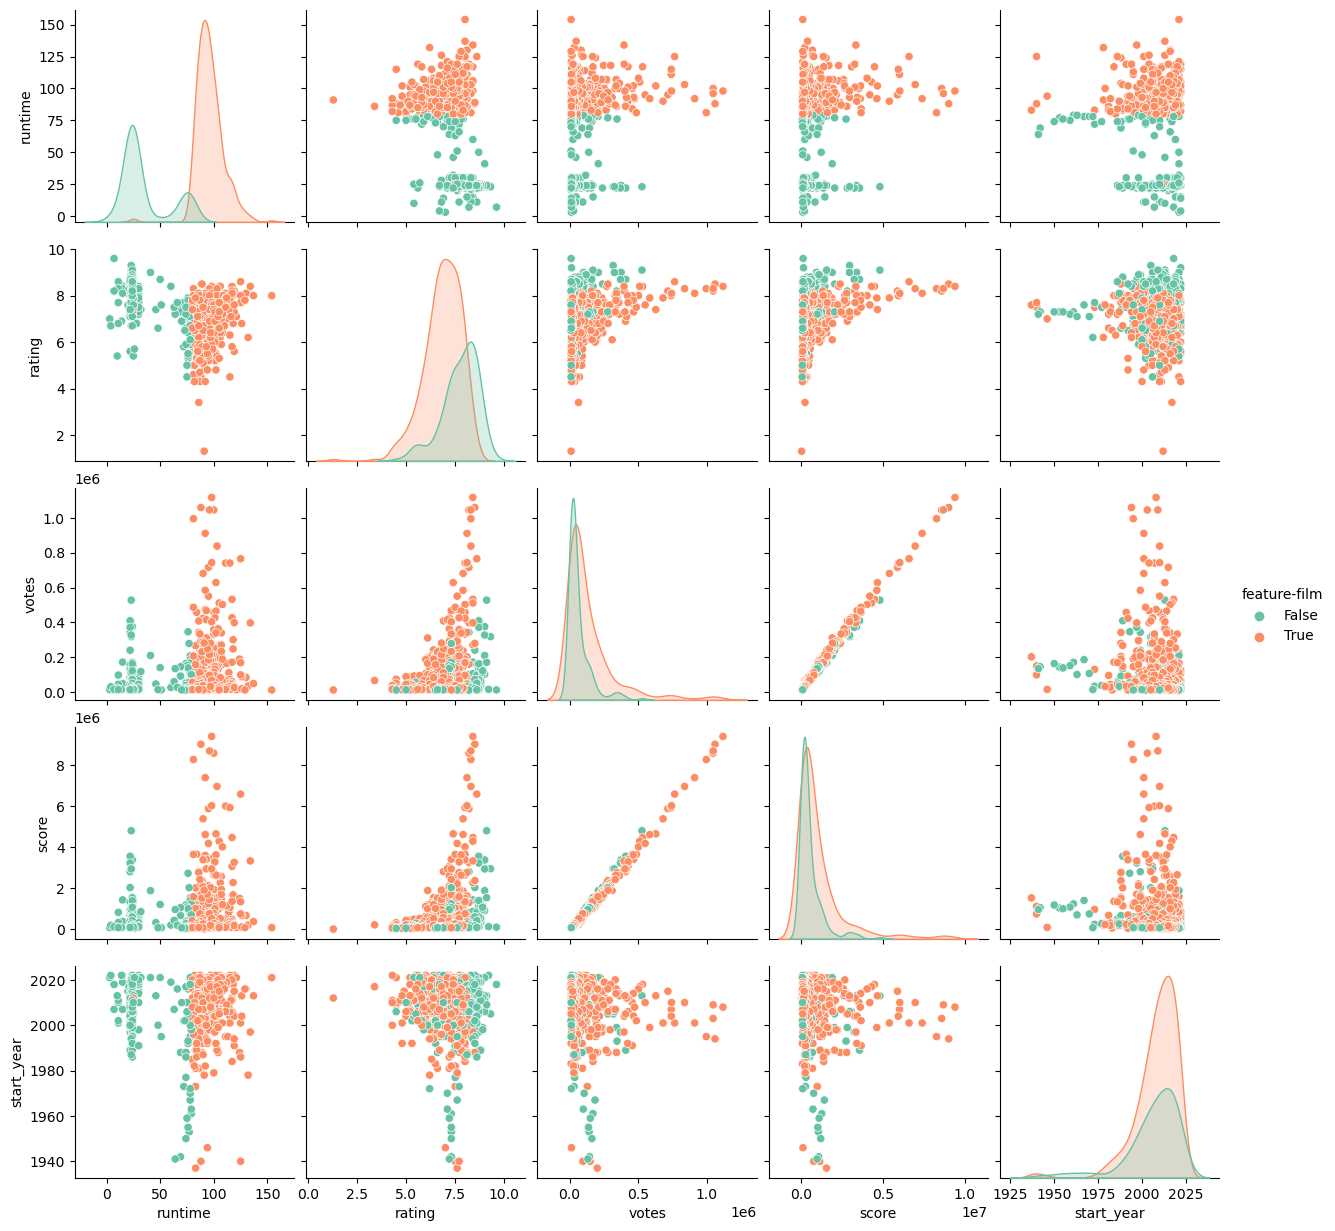

In [12]:
sns.pairplot(data = tvdf, hue = 'feature-film', palette = 'Set2')

From the pairs plot above we can see that there is no significant signs of correlations between the variables (excluding scores as scores=rating * votes).  
The colors are split by whether the animation is a feature film or not.

### Scatterplot of Ratings by Starting Year and Serialization

[Text(0.5, 1.0, 'Ratings for Continuing and Non-Continuing Animations Over Time')]

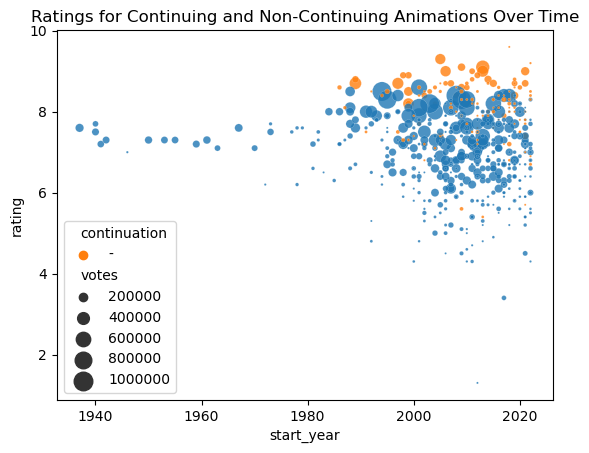

In [13]:
sns.scatterplot(data=tvdf, x="start_year", y="rating", size="votes",
                hue='### Pairs Pplot', legend=True, sizes=(2, 200), alpha=0.8).set(
    title="Ratings for Continuing and Non-Continuing Animations Over Time")

From the scatterplot above we can notice that as the years increase there seems to be more animated shows. Animations that are not from a series tends to have greater number of votes, but animated series tends to have higher ratings. There seems to be massive increase in number of animated shows after 1990.

### Rating Distribution

Text(0.5, 1.0, 'Ratings for all Animations')

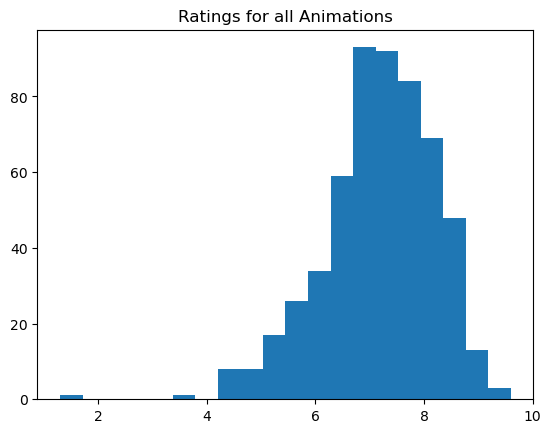

In [14]:
# Rating
rating_mean = tvdf["rating"].mean()
plt.hist(tvdf["rating"], bins=20)
plt.title("Ratings for all Animations")

The plot above shows the distribution of the ratings given for all animations. The average score is 7.16.

### Violin Plot - Ratings by Seasons and Ratings by Animation has Continuation

[Text(0.5, 1.0, 'Distribution of Rating if Show has Multiple Seasons')]

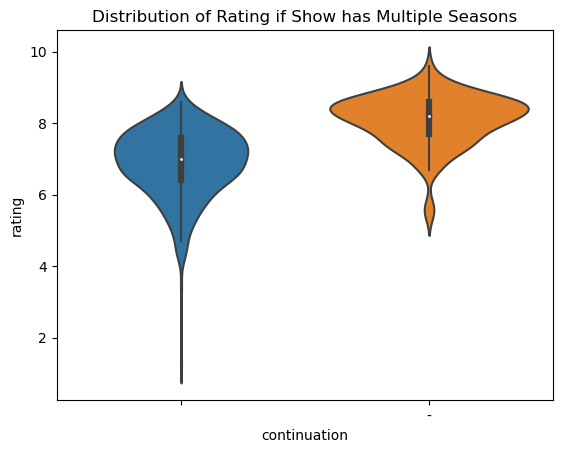

In [15]:
sns.violinplot(x='continuation', y="rating",
               data=tvdf).set(title = 'Distribution of Rating if Show has Multiple Seasons')

[Text(0.5, 1.0, 'Distribution of Rating if Show is a Feature Film')]

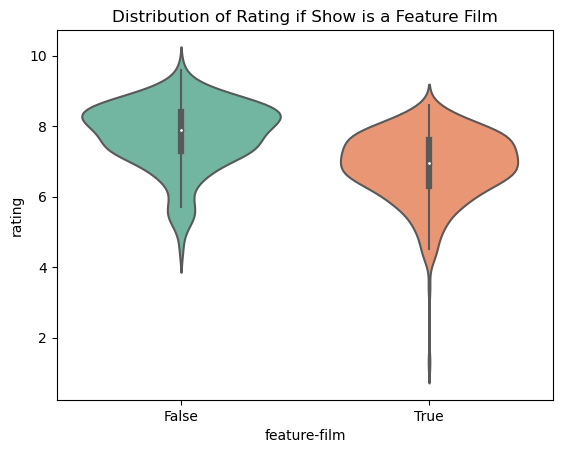

In [16]:
sns.violinplot(x='feature-film', y="rating",
               data=tvdf, palette = 'Set2').set(title = 'Distribution of Rating if Show is a Feature Film')

These two violin plots above shows the distribution of the ratings.  
The first plot shows that animations with multiple seasons tend to have higher overall rating than shows with only a single season.  
The second plot shows that animations that are feature films (>= 80 minutes) tend to have lower ratings than animated shows that are shorter.

### Most Common Genres

,index,total
0,Adventure,421
1,Comedy,270
2,Action,209
3,Drama,87
4,Family,46
5,Fantasy,22
6,Crime,13
7,Others,34


Text(0.5, 1.0, 'Most Common Genres')

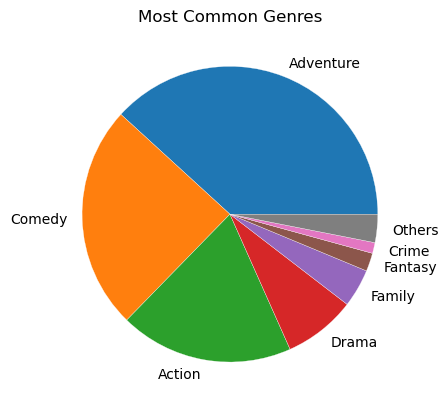

In [17]:
genre1_counts = pd.DataFrame(tvdf['genre1'].value_counts()).reset_index()
genre2_counts = pd.DataFrame(tvdf['genre2'].value_counts()).reset_index()
genre_counts = genre1_counts.merge(genre2_counts, how='outer', on='index').fillna(0)
genre_counts['genre1'] = genre_counts['genre1'].astype(int)
genre_counts['genre2'] = genre_counts['genre2'].astype(int)
genre_counts['total'] = genre_counts['genre1'] + genre_counts['genre2']
genre_counts = genre_counts.drop(columns = ['genre1','genre2']).sort_values("total", ascending=False).reset_index(drop = True)
# display(genre_counts.head(7))

tempdf = pd.DataFrame({'index': 'Others', 'total': genre_counts[7:]['total'].sum()}, index = [1])
# genre_counts = df.append(df2, ignore_index = True)
# display(tempdf)

genre_counts = genre_counts[0:7]
genre_counts = pd.concat([genre_counts, tempdf]).reset_index(drop=True)

display(genre_counts)
plt.pie(genre_counts["total"], labels = genre_counts["index"], wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
plt.title('Most Common Genres')


The pie chart illustrates the proportions of genres for each animation, with Adventure and Comedy being the two most common genres of animated films.

### Ratings by Genre

/var/folders/4m/lzfdbhvs26x_3tmz3_nmslph0000gn/T/ipykernel_84633/2063508274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combin_rating['log_votes'] = np.log(combin_rating['votes'])


[Text(0.5, 1.0, 'Popularity by Popular Genres')]

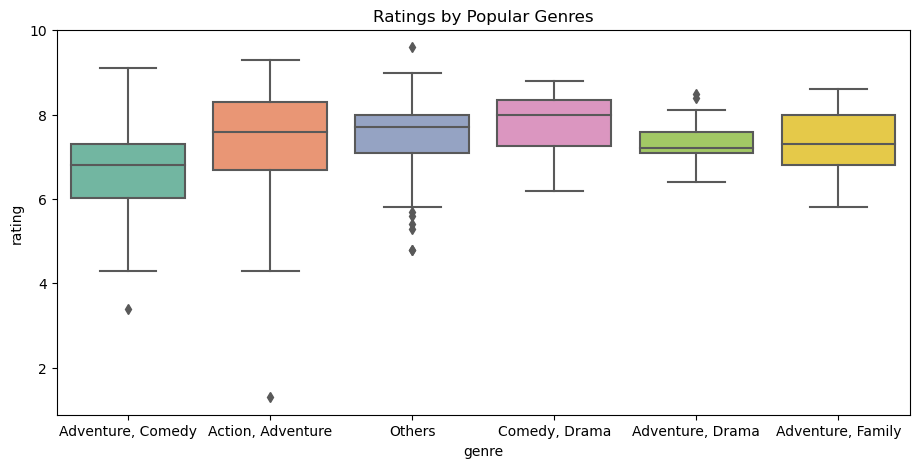

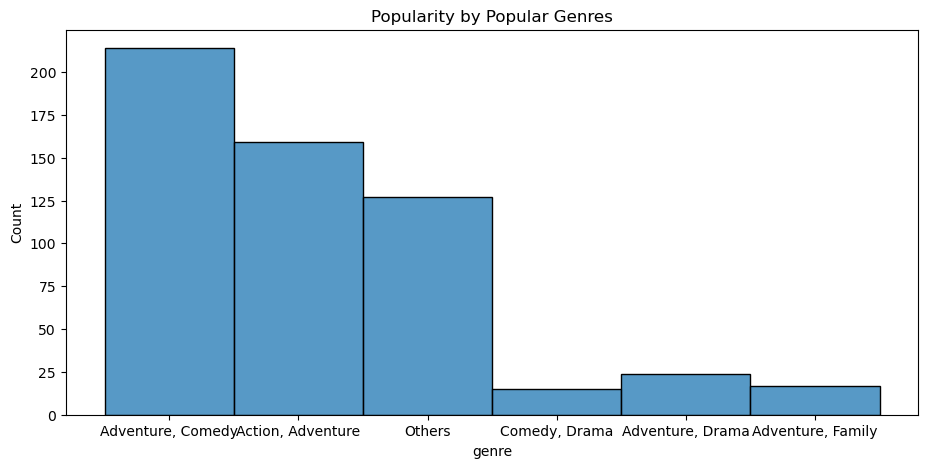

In [18]:
# Ratings and votes by genre combination
tvdf['genre'].value_counts().head(7)
populars = ['Adventure, Comedy',
            'Action, Adventure',
            'Adventure, Drama',
            'Adventure, Family',
            'Comedy, Drama']
combin_rating = tvdf[['title', 'genre', 'rating', 'votes']]
combin_rating.loc[~combin_rating['genre'].isin(populars), 'genre'] = 'Others'
combin_rating['log_votes'] = np.log(combin_rating['votes'])

plt.figure(figsize=(11, 5))
sns.boxplot(data = combin_rating, x = 'genre', y = 'rating',
            palette = "Set2").set(title = 'Ratings by Popular Genres')

# combin_votes = combin_rating[['genre', 'votes']].groupby('genre').sum('votes')
### Pairs Pplot
sns.histplot(data = combin_rating, x = 'genre').set(title = 'Popularity by Popular Genres')

From the boxplot we can see that the genre 'Adventure, Comedy' has the lowest overall rating.

From the histogram we can see that 'Adventure, Comedy' is 

Even though looking at combinations will theoretically lead to less biased results, our findings will actually be heavily biased by the abundance of the Adventure main and sub genre (top 4 combinations all include this).  
Thus, we will look at the genres separately and look at viewer receptions.

### Ratings by the Main and Sub Genres

[Text(0.5, 1.0, 'Ratings by Popular Genres-Overall')]

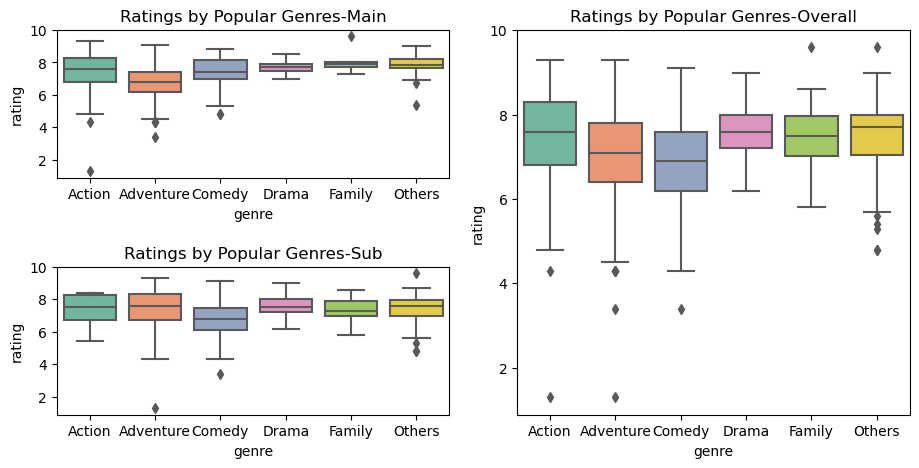

In [19]:
# Ratings of each genre
popular = ['Adventure', 'Comedy', 'Action', 'Drama', 'Family']

genre1_rating = tvdf[['title', 'rating', 'genre1']].rename(columns={'genre1' : 'genre'})
genre1_rating.loc[~genre1_rating['genre'].isin(popular), 'genre'] = 'Others'
genre1_rating = genre1_rating.sort_values('genre')

genre2_rating = tvdf[['title', 'rating', 'genre2']].rename(columns={'genre2' : 'genre'})
genre2_rating.loc[~genre2_rating['genre'].isin(popular), 'genre'] = 'Others'
genre2_rating = genre2_rating.sort_values('genre')

genre_rating = pd.concat([genre1_rating,genre2_rating]).reset_index(drop=True)

### Pairs Pplot
sns.boxplot(data = genre1_rating, x = 'genre', y = 'rating',
            palette = "Set2").set(title = 'Ratings by Popular Genres-Main')
plt.subplot(Grid_plot[1, :3])
sns.boxplot(data = genre2_rating, x = 'genre', y = 'rating',
            palette = "Set2").set(title = 'Ratings by Popular Genres-Sub')
plt.subplot(Grid_plot[:, 3:])
sns.boxplot(data = genre_rating, x = 'genre', y = 'rating',
            palette = "Set2").set(title = 'Ratings by Popular Genres-Overall')

In [20]:
genre_rating.groupby('genre').describe() # Numerical information for right plot

rating                                                 
           count      mean       std  min    25%  50%    75%  max
genre                                                            
Action     209.0  7.471292  1.046073  1.3  6.800  7.6  8.300  9.3
Adventure  421.0  7.037292  1.058935  1.3  6.400  7.1  7.800  9.3
Comedy     270.0  6.846667  1.032433  3.4  6.200  6.9  7.600  9.1
Drama       87.0  7.628736  0.565667  6.2  7.200  7.6  8.000  9.0
Family      46.0  7.421739  0.757456  5.8  7.025  7.5  7.975  9.6
Others      79.0  7.451899  0.931481  4.8  7.050  7.7  8.000  9.6

The plots above shows the ratings given to the different genres of animation.  

If we were to split the ratings treating the first genre as the main and the second as the sub genre, we can notice that the median of shows having Action and Adventure as the main genre seems to have lower overall rating. Less common genres seem to have relatively well reception by its viewers.  

Looking at genres in general (plot on the right), the two most popular genres (Adventure and Comedy) has the lowest ratings compared to the other genres. There does not seem to be a genre that receives the highest rating, but it could be inferred that viewers do have increased standards for shows within a saturated genre.

### Popularity of Genres

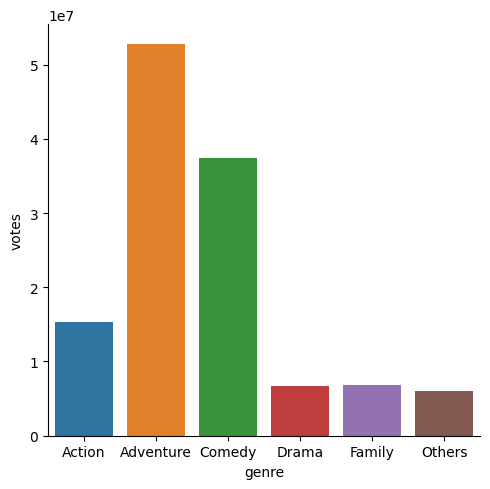

In [21]:
# Popularity for each genre (number of votes)
# genre_1 = tvdf[['title', 'rating', 'votes', 'genre1']]
# genre2_rating = tvdf[['title', 'rating', 'votes', 'genre2']]

genre1_votes = tvdf[['title', 'rating', 'votes', 'genre1']].rename(columns={'genre1' : 'genre'})
genre1_votes.loc[~genre1_votes['genre'].isin(popular), 'genre'] = 'Others'
genre1_votes = genre1_votes.sort_values('genre')

genre2_votes = tvdf[['title', 'rating', 'votes', 'genre2']].rename(columns={'genre2' : 'genre'})
genre2_votes.loc[~genre2_votes['genre'].isin(popular), 'genre'] = 'Others'
genre2_votes = genre2_votes.sort_values('genre')

genre_votes = pd.concat([genre1_votes,genre2_votes]).reset_index(drop=True)[['votes','genre']]
genre_votes = genre_votes.groupby('genre').sum('votes').reset_index()
genre_votes
sns.catplot(data=genre_votes, x="genre", y="votes", kind='bar')### Pairs Pplot

From the total votes count, we can see that the top 3 genres are 'Adventure', 'Comedy', and 'Action' respectively. This aligns with the order from the most common genres as shown previously.

### Most Common Terms in Description

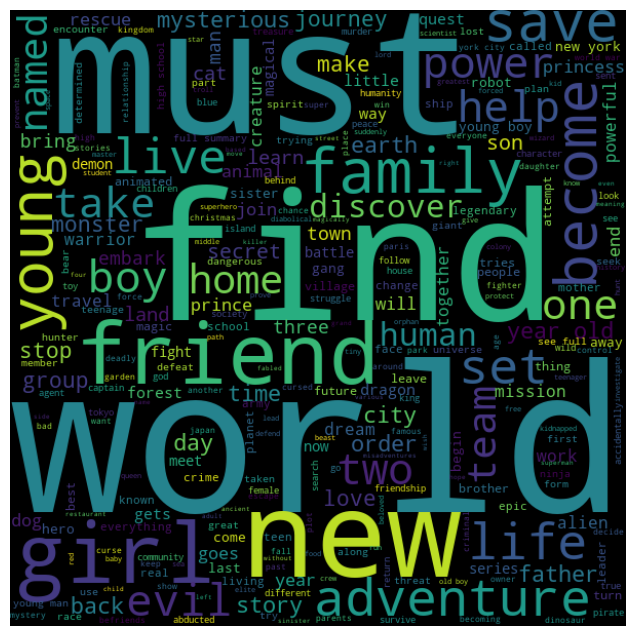

In [22]:
# Descriptions - Most Frequent Terms
desc_text = tvdf['desc'].fillna("")
desc_text = " ".join(tvdf['desc'].str.lower())
desc_text

wordcloud = WordCloud(width=600, height=600, ma### Pairs Pplotx_words=300, max_font_size=300, margin=0,random_state=18).generate(desc_text)

plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

From the Word Cloud above, we can see that the most common terms that appear in the description are 'world', 'find', 'must', 'new', and 'friend. There are many more terms, but all seem to align with terms used to describe an adventure, journey, or discovering a new region.

# Data Diagnosis

Next, we will generate a model to see if there is a relationship between viewer count and viewer rating that we can capture accurately. But first, we will check for the assumptions of linear regression.

From the Pairsplot we can examine how there seems to be outliers and heteroscedastic trends regarding the distribution of the data. We will keep these issues in mind as we need to satisfy certain assumptions to proceed with our regression models.

In [23]:
tvdf_modelling = tvdf.copy().rename(columns = {'feature-film' : 'feature_film'})
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sstats
import statsmodels.stats.api as sms
import scipy as sp
import scipy.stats as ss

<AxesSubplot:xlabel='votes', ylabel='rating'>

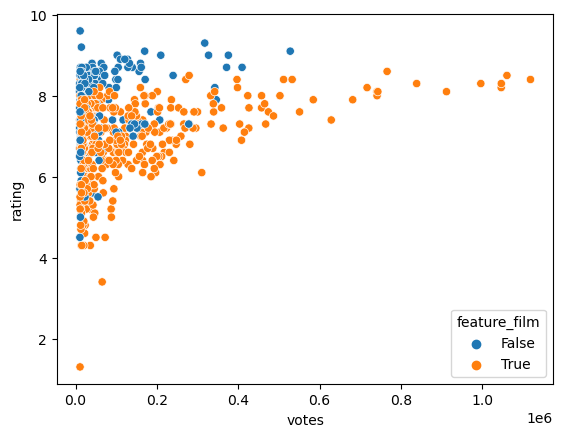

In [24]:
sns.scatterplot(data = tvdf_modelling, y = 'rating', x = 'votes', hue='feature_film')

In [25]:
# Fit GLS model (Generalized Least Squares)
model = smf.ols(formula = 'rating ~ votes + continuation * feature_film', data = tvdf_modelling)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     85.69
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.43e-56
Time:                        01:33:17   Log-Likelihood:                -672.93
No. Observations:                 556   AIC:                             1356.
Df Residuals:                     551   BIC:                             1377.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Diagnostic Plots

<Figure size 800x400 with 0 Axes>

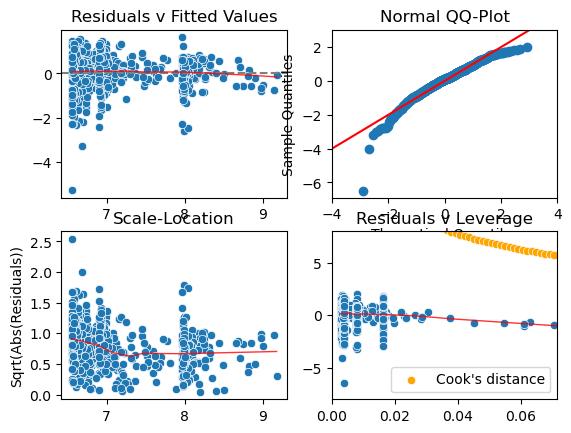

In [26]:
# Diagnostic plot helper function
plt.figure(figsize=(8, 4))
def diagnostics(results):
    # Variables for diagnostic
    residuals = results.resid                                    # Model Residuals
    fitted_values = results.fittedvalues                         # Model Fitted Values
    influence = results.get_influence()                          # Influence Factors
    norm_residuals = influence.resid_studentized_internal        # Normalized Residuals
    norm_sqrt_abs = np.sqrt(np.abs(norm_residuals))              # Sqrt of Absolute Residuals
    leverage = influence.hat_matrix_diag                         # Leverage using statsmodels
    cooks_distance = influence.cooks_distance[0]                 # Cooks Distance

    fig, ax = plt.subplots(nrows=2, ncols=2)

    # Residuals (Check Linearity)
    residual_plot = sns.scatterplot(x=fitted_values, y=residuals, ax = ax[0,0])
    residual_plot.axhline(y=0, color='grey', linestyle='dashed')
    residual_plot.set(title = "Residuals v Fitted Values", xlabel='Fitted Values', ylabel = 'Residuals')
    sns.regplot(x=fitted_values, y=residuals,
                scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax = ax[0,0])

    # QQ-Plot (Check Normality)
    sm.qqplot(residuals, fit=True, line='45', ax = ax[0,1])
    ax[0,1].set_title('Normal QQ-Plot')
    ax[0,1].set_xlim(-4, 4)

    # Scale-Location Plot (Check Homoscedasticity)
    scale_loc_plot = sns.scatterplot(x = fitted_values, y=norm_sqrt_abs, ax = ax[1,0])
    scale_loc_plot.set(title = "Scale-Location", xlabel='Fitted Values', ylabel = 'Sqrt(Abs(Residuals))')
    sns.regplot(x=fitted_values, y=norm_sqrt_abs,
                scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax = ax[1,0])

    # Leverage Plot (Check Influential Points)
    sns.scatterplot(x = leverage, y = norm_residuals, ax = ax[1,1])
    sns.regplot(x = leverage, y = norm_residuals,
                scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax[1,1])
    ax[1,1].set_title('Residuals v Leverage')

    # Generate Cooks line for Levereage Plot
    def cooks_line(factor):
        p = len(results.params)
        formula = lambda x: np.sqrt((0.5 * p * (1 - x)) / x)
        x = np.linspace(0.001, max(np.sort(leverage)[:-1]), 50)
        y = formula(x)
        return x,y

    xtemp, ytemp = cooks_line(1)
    sns.scatterplot(x=xtemp, y=ytemp, label="Cook's distance", ax=ax[1,1], c = 'orange')
    ax[1,1].set_xlim(0, max(np.sort(leverage)[:-1])+0.001)
    ax[1,1].set_ylim(-8, 8)

def diagnostic_tests(results):
    # Use Breusch-Pagan test to check Heteroscedastic
    bp_test = pd.DataFrame(sms.het_breuschpagan(results.resid, results.model.exog), 
                               columns=['bptest_value'],
                               index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])
    display(bp_test)
    
    # Use Kolmogorov-Smirnov test and Shapiro-Wilk test to check for normality
    ks_test = sp.stats.kstest(results.resid, 'norm')
    sw_test = sp.stats.shapiro(results.resid)
    print("ks test p-value: ", ks_test[1])
    print("sw test p-value: ", sw_test[1])

diagnostics(model_result)

In [27]:
diagnostic_tests(model_result)

,bptest_value
Lagrange multiplier statistic,16.901767
p-value,0.002020
f-value,4.318728
f p-value,0.001898


ks test p-value:  0.0003831519805023628
sw test p-value:  1.3421671543265012e-12


Our four diagnostic plots allows us to check for the four different linear regression assumptions:
1. The **"Residuals v. Fitted Values"** plot exhibits a horizontal line of best fit, meaning that there is a linear relationship present.  
2. The **"Normal Q-Q plot"** shows several points deviating from the normal on both ends. Along with the small p-value obtained from the Kolmogorov-Smirnov and Shapiro-Wilk tests, our points are not normally distributed.  
3. The **"Scale-Location"** plot is used to check for equal variance. Since the regression line has a slight concaving pattern and our bptest has smal p-values, there is a heteroscedastic issue present.  
4. The **"Residuals v Leverage"** plot and **Cooks Distance** are used to check for influential points. Since none of the lie outside the curve, we can conclude that there are no influential points.

In [28]:
# VIF Score (Measuring Collinearity)
vifs = pd.DataFrame()
vifs["Features"] = model_result.model.exog_names
vifs["VIF Factor"] = [sstats.outliers_influence.variance_inflation_factor(model_result.model.exog, i) for i in range((model_result.model.exog).shape[1])]
display(vifs)

,Features,VIF Factor
0,Intercept,9.112697
1,continuation[T.-],2.385453
2,feature_film[T.True],2.427826
3,continuation[T.-]:feature_film[T.True],1.025940
4,votes,1.051308


VIF lets us know if multicollinearity exists. If we have an abnormally high VIF factor, we could determine that the corresponding predictor provides little to no significant addition to the model and is already explained by other predictors (Note: VIF>10 means at least 90% is explained by predictors).  
Since the Intercept has a high VIF factor, we will remove it from our model.

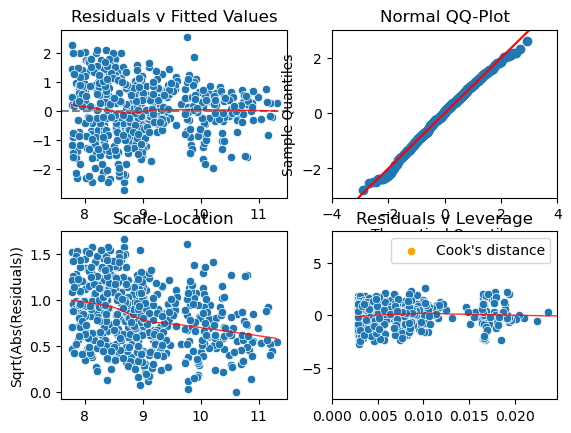

In [29]:
# Fix Multicollinearity COMPLETE
modelXint = smf.ols(formula = 'rating ~ votes + continuation * feature_film - 1', data = tvdf_modelling)
modelXint_result = modelXint.fit()
residuals = modelXint_result.resid
# diagnostics(modelXint_result)

vifsXint = pd.DataFrame()
vifsXint["Features"] = modelXint_result.model.exog_names
vifsXint["VIF Factor"] = [sstats.outliers_influence.variance_inflation_factor(modelXint_result.model.exog, i) for i in range((modelXint_result.model.exog).shape[1])]
# display(vifsXint)
## Done
## PCA is also an optional method to reduce dimensionality

# Fix Normality Assumption COMPLETE
## Solution:
### Check and Remove Outliers
iqr = ss.iqr(residuals)
q1, q3 = residuals.quantile([0.25,0.75])
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr) 
outliers = (residuals < lower_bound) | (residuals > upper_bound)
non_outliers = (residuals >= lower_bound) & (residuals <= upper_bound)
# tvdf_modelling[outliers]
tvdf_reduced = tvdf_modelling[non_outliers]
model_reduced = smf.ols(formula = 'rating ~ votes + continuation * feature_film - 1', data = tvdf_reduced)
model_reduced_result = model_reduced.fit()
# diagnostics(model_reduced_result)
# diagnostic_tests(model_reduced_result) 
### Nonlinear Transformation (log/expo)
model_transform = smf.ols(formula = 'np.power(rating, 1.11) ~ np.log(np.log(votes)) + (continuation) * feature_film - 1', data = tvdf_reduced)
model_transform_result = model_transform.fit()

diagnostics(model_transform_result)
# diagnostic_tests(model_transform_result) # ks and sw test improved significantly
## We are mainly concerned with ks test as ks test provides better results for larger sample than sw.

# Fix Heteroscedastic Assumption 
## We have already applied logarithmic previously and the spread of data is more evenly distributed.


Now with the assumptions being met, we can proceed with checking the Linear Regression result.

In [30]:
model_transform_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.power(rating, 1.11)   R-squared:                       0.428
Model:                                OLS   Adj. R-squared:                  0.424
Method:                     Least Squares   F-statistic:                     100.8
Date:                    Sat, 04 Feb 2023   Prob (F-statistic):           5.49e-64
Time:                            01:33:18   Log-Likelihood:                -755.47
No. Observations:                     543   AIC:                             1521.
Df Residuals:                         538   BIC:                             1542.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
continuation[]                            -1.7536      0.992     -1.768      0.078      -3.702       0.195
continuation[-]                           -0.2401      0.988     -0.243      0.808      -2.180       1.700
feature_film[T.True]                      -0.4634      0.138     -3.359      0.001      -0.734      -0.192
continuation[T.-]:feature_film[T.True]     1.2942      0.993      1.303      0.193      -0.656       3.245
np.log(np.log(votes))                      4.4805      0.419     10.688      0.000       3.657       5.304
==============================================================================
Omnibus:                        5.372   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.176
Skew:                          -0.199   Prob(JB):                       0.0752
Kurtosis:                       2.733   Cond. No.                         91.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using a complete dataset, our linear regression model results with an R-squared value of 0.428. This means that our regression captures around 42.8% of the true relationship.  
A linear regression is not the best model to predict the rating given to an animation given the length of animation, whether the animation has multiple seasons, and the popularity of the animation.

# Linear Regression Model Summary

In [88]:
# Conclude with training a model and testing the trained model's prediction accuracy using RMSE.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model

tvdf_final = tvdf_reduced[['rating', 'votes', 'continuation', 'feature_film']]
tvdf_final['continuation'] = tvdf_final['continuation'] == '-'

np.random.seed(830)
train, test = train_test_split(tvdf_final, test_size=0.25)
trained_model = smf.ols(formula = 'np.power(rating, 1.11) ~ np.log(np.log(votes)) + (continuation) * feature_film - 1',
                        data = train).fit()
# trained_model.params

y_test = test['rating']
X_test = test[['votes', 'continuation', 'feature_film']]
y_train = train['rating']
X_train = train[['votes', 'continuation', 'feature_film']]
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Coefficients: ", regr.coef_)
print("RMSE Value: ", rmse)
print("R2 Score: ", r2)

Coefficients:  [ 2.03204925e-06  1.13853097e+00 -2.85311885e-01]
RMSE Value:  0.7025610783968989
R2 Score:  0.4441971352314851


/var/folders/4m/lzfdbhvs26x_3tmz3_nmslph0000gn/T/ipykernel_84633/479898549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvdf_final['continuation'] = tvdf_final['continuation'] == '-'


To conclude this study, we will test the linear regression model with our dataset by splitting it into training and testing set. By building the model, fitting the model, and finally making predictions with our model, we end up with an RMSE value of 0.703 and $R^2$ value of 0.44.  
The RMSE value is relatively high in the context of our dataset and the low $R^2$ tells us that there may not be an obvious linear relationship present.  
Hence, popularity, continuation, and the length of the film may give us some insight to how a film will be rated, the relationship between these variables are not linear.  

To improve upon this study, different models could be built, genres could be incorporated for better study, and it may bring a lot of insight towards how to approach this prediction by looking at the reviews given by users and see the most common keywords that are used to praise or criticize animations.